This graph is DAG? True
numbersOfNodes: 16 numbersOfEdges: 32


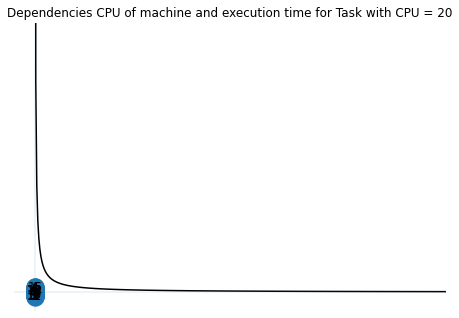

numbers of machines 5
Time of all calculation is  1.6048393891911066
Common price for one workflow in USD (depends on time) 23.417816367076625
Common time for calculation and tarsfer 1.20362954189333
CPUBest 3 memoryBest 0 HDDBest 3 bestTime 2.512553736772487 bestBudget in USD 24.956482076719578
list of boost CPU [1.0, 2.0, 8.0, 12.0]
list of increasing price [1.0, 2.2787610619469025, 10.000000000000002, 15.79646017699115]
price for one boosting [1.0, 1.1393805309734513, 1.2500000000000002, 1.3163716814159292]
{0: [4.544563970690616, 4.539081514550265], 1: [3.294563970690615, 3.289081514550264], 2: [2.357063970690615, 2.3515815145502645], 3: [2.2528973040239486, 2.247414847883598]}
{0: [30.30907289926204, 30.303590443121692], 1: [17.809072899262045, 17.803590443121692]}
{1: [17.809072899262045, 17.803590443121692]}
CPUBest 16 memoryBest 16 HDDBest 475 bestTime 3.294563970690615 bestBudget in USD 7.583528246143424
CPUBest 16 memoryBest 16 HDDBest 475 bestTime 17.809072899262045 bestBudg

In [1]:
# эволюционный алгоритм
from ipynb.fs.full.optimalCloudKiseleva import *

In [2]:
numbersOfTasks = 16
G = generateTask(numbersOfTasks)

# brute force

In [3]:
import math
import time
startTime = time.time()

CPUOfTask, memoryOfTask = 100, 100
limitBudget = 100 # предел бюджета
bestTime = math.inf 


for machina in range(1, 300):
    for i in range(len(CPU)):
        for j in range(len(memory)):
            for z in range(len(HDD)):
                numberOfMachines = machina
                setOfAllMachines = setOfMachines(numberOfMachines)
                for k in range(numberOfMachines):
                    m1 = machine()
                    m1.CPU = CPU[i]
                    m1.memory = memory[j]
                    m1.HDD =  HDD[z]
                    m1.availability = "free"
                    m1.price = price[i] + memory[j] /3000  + HDD[z] / 30000
                    setOfAllMachines.addMachines(m1)


                time, budget = calculateTimeAndPrice(CPUOfTask, memoryOfTask, numberOfMachines, setOfAllMachines, G)

                if budget < limitBudget and bestTime > time:
                    bestTime = time
                    bestBudget = budget
                    CPUBest = i
                    memoryBest = j
                    HDDBest = z  
                    bestNumber = machina

import time
print("Time of execution:", -startTime + time.time())
                
print("CPUBest",CPUBest,"memoryBest", memoryBest,"HDDBest", HDDBest,"bestTime", bestTime,"bestBudget in USD", bestBudget, "number of machine", bestNumber)

Time of execution: 8.59318208694458
CPUBest 2 memoryBest 0 HDDBest 3 bestTime 13.325304783950616 bestBudget in USD 95.21921393004115 number of machine 2


# эволюционный алгоритм


In [4]:
import time
startTime = time.time()

def resultFunction(first_input):
    first_input = list(map(int, first_input))
    number, i, j, k = first_input
    #rint(first_input)
    #rint(number, i, j, k)
    #rint(HDD[k])
    numberOfMachines = number
    setOfAllMachines = setOfMachines(numberOfMachines)
    for s in range(numberOfMachines):
        m1 = machine()
        m1.CPU = CPU[i]
        m1.memory = memory[j]
        m1.HDD =  HDD[k]
        m1.availability = "free"
        m1.price = price[i] + memory[j] /3000  + HDD[k]/ 30000
        setOfAllMachines.addMachines(m1)
    

    time, budget = calculateTimeAndPrice(CPUOfTask, memoryOfTask, numberOfMachines, setOfAllMachines, G)
    return time,budget






from scipy.optimize import differential_evolution
import numpy as np
first_input = [1,0,0,0]


# параметры машин
CPU = [8,16,64, 96]
memory = [16,32,64,128, 256]
HDD = [475,600,2400,3600]
price = [0.3616, 0.824, 3.616, 5.712]


# лимит бюджета
budgetLimit = 100


# параметры задания
CPUOfTask, memoryOfTask = 100, 100

listResult = []

def resultFunctionForGen(first_input):
    
    
    
    import math
    if math.isnan(first_input[0]):
        return -1
    

    first_input = list(map(int, first_input))
    
    if first_input in listResult:
        return math.inf
    
    number, i, j, k = first_input
    #rint(first_input)
    #rint(number, i, j, k)
    #rint(HDD[k])
    numberOfMachines = number
    setOfAllMachines = setOfMachines(numberOfMachines)
    for s in range(numberOfMachines):
        m1 = machine()
        m1.CPU = CPU[i]
        m1.memory = memory[j]
        m1.HDD =  HDD[k]
        m1.availability = "free"
        m1.price = price[i] + memory[j] /3000  + HDD[k]/ 30000
        setOfAllMachines.addMachines(m1)
    

    time, budget = calculateTimeAndPrice(CPUOfTask, memoryOfTask, numberOfMachines, setOfAllMachines, G)
    
    
    listResult.append(first_input)
    
    import math
    if budget > budgetLimit:
        time += math.inf
        
    return time


bounds = [(1, 300),(0, 3), (0, 4), (0,3)]
result = differential_evolution(resultFunctionForGen, bounds, maxiter = (len(CPU) + len(memory) + len(HDD)))


print("Time of execution:", -startTime + time.time())

if result.fun == math.inf:
    print("увеличьте бюджет")
else:
    print("параметры машин",list(map(int, result.x)))
    print("время",result.fun)
    print("стоимость",resultFunction(list(map(int, result.x)))[1])
    print("кол-во итераций", result.nit)

Time of execution: 0.34544801712036133
параметры машин [2, 2, 1, 2]
время 13.326346450617281
стоимость 94.34464835390946
кол-во итераций 13


/home/anastasiia/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


# алгоритм, который я назвала жадным

In [5]:
import time
startTime = time.time()

numberOfMachines, bestTimeForNumberOfMachines, bestConfiguration = findNumberOfMachine(100, 100, 100, G)
print("Time of execution:", -startTime + time.time())

print(numberOfMachines, bestTimeForNumberOfMachines, bestConfiguration)

{0: [130.2423003979857, 130.21488811728395], 1: [67.74230039798572, 67.71488811728396], 2: [20.867300397985705, 20.83988811728395], 3: [15.658967064652371, 15.631554783950616]}
{3: [15.658967064652371, 15.631554783950616]}
CPUBest 96 memoryBest 16 HDDBest 475 bestTime 15.658967064652371 bestBudget in USD 88.05551800949614
{0: [68.0265109243015, 68.01280478395063], 1: [36.7765109243015, 36.76280478395062], 2: [13.339010924301492, 13.325304783950616]}
{2: [13.339010924301492, 13.325304783950616]}
CPUBest 64 memoryBest 16 HDDBest 475 bestTime 13.339010924301492 bestBudget in USD 92.66781180034381
{0: [47.48791443307342, 47.478777006172834], 1: [26.654581099740092, 26.645443672839505]}
{1: [26.654581099740092, 26.645443672839505]}
CPUBest 16 memoryBest 16 HDDBest 475 bestTime 26.654581099740092 bestBudget in USD 65.300740378391
{0: [37.36861618745939, 37.36176311728395], 1: [21.743616187459388, 21.73676311728395]}
{1: [21.743616187459388, 21.73676311728395]}
CPUBest 16 memoryBest 16 HDDBes